In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
d = pd.read_csv("employee_promotions1.csv")

In [3]:
d.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
d.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


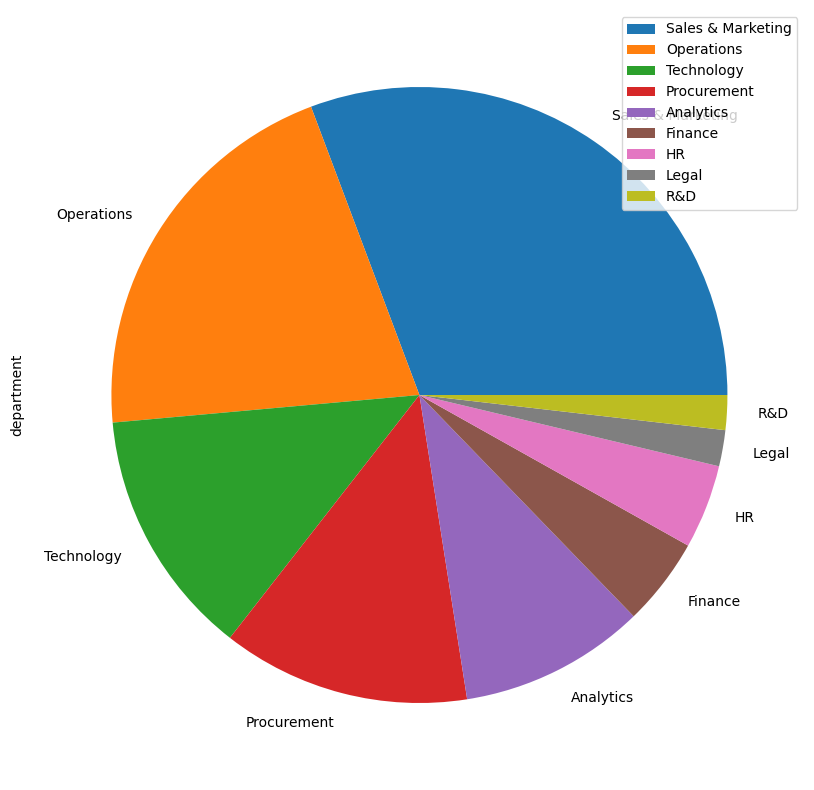

In [6]:
plt.figure(figsize=(10,10))
d['department'].value_counts().plot(kind='pie').legend()
plt.show()

#Working Domain pie chart

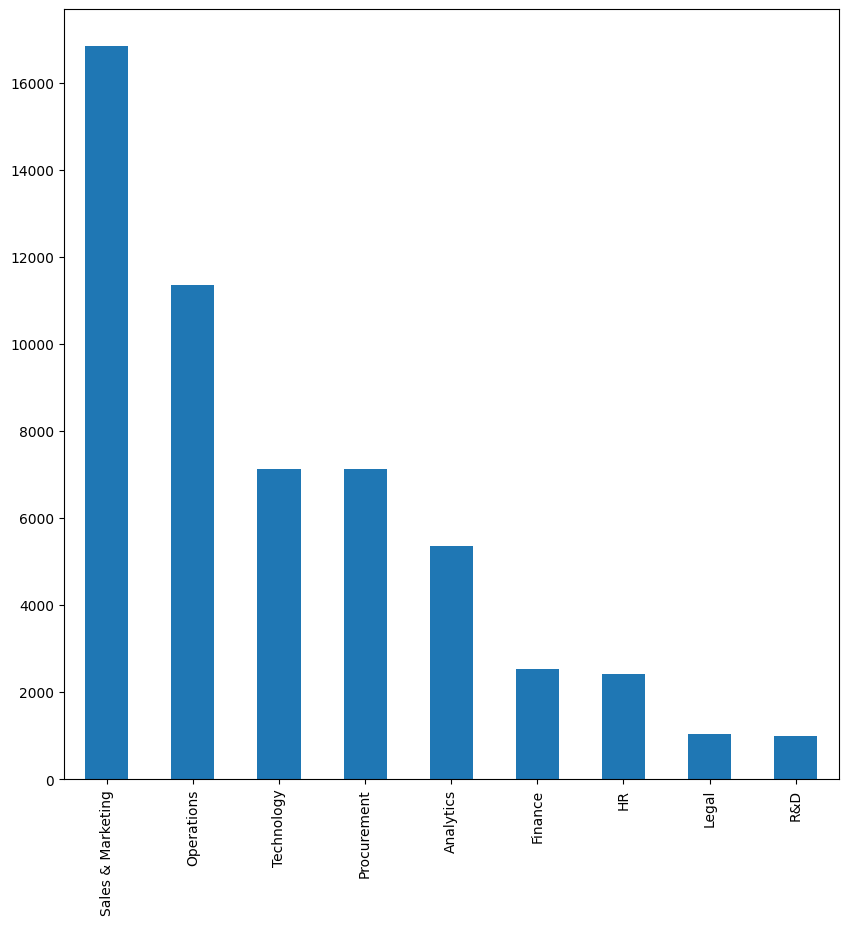

In [7]:
plt.figure(figsize=(10,10))
d['department'].value_counts().plot(kind='bar')
plt.show()


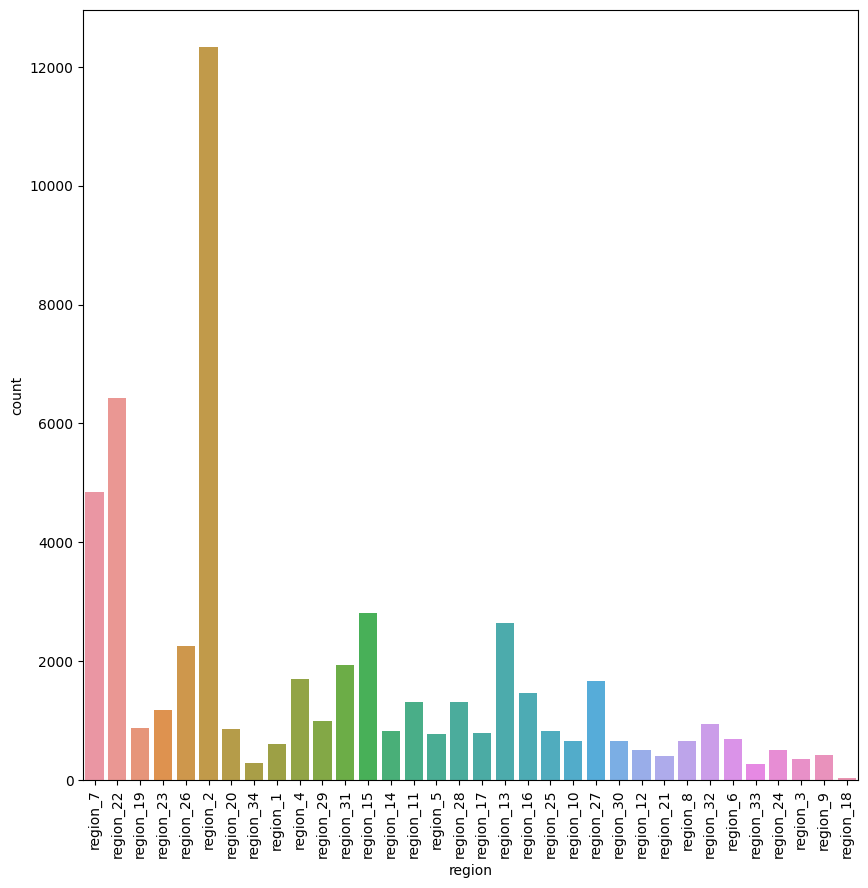

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(data=d,x='region')
plt.xticks(rotation=90)
plt.show()
#More Number of people are working in sales & Marketing.

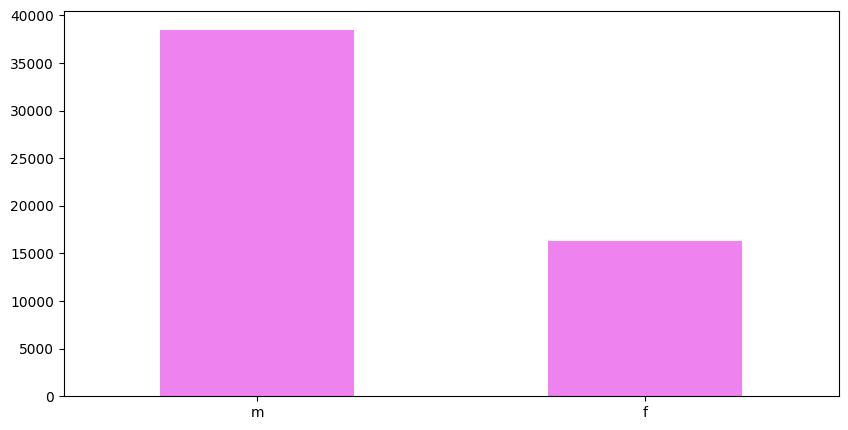

In [9]:
plt.figure(figsize=(10,5))
d['gender'].value_counts().plot(kind='bar',color='violet')
plt.xticks(rotation=0)
plt.show()
#Gender distribution barplot

<AxesSubplot: >

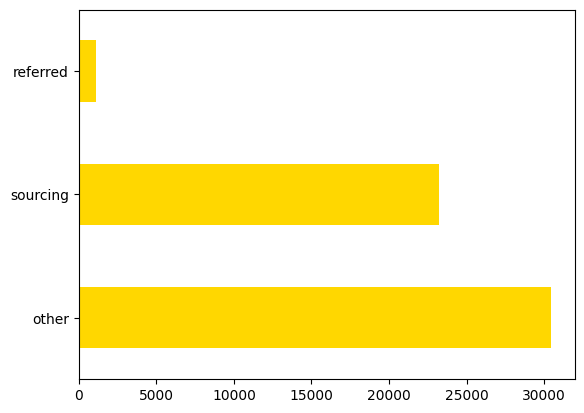

In [10]:
d['recruitment_channel'].value_counts().plot(kind='barh',color='gold')
#Recruitment Channel barplot

<AxesSubplot: >

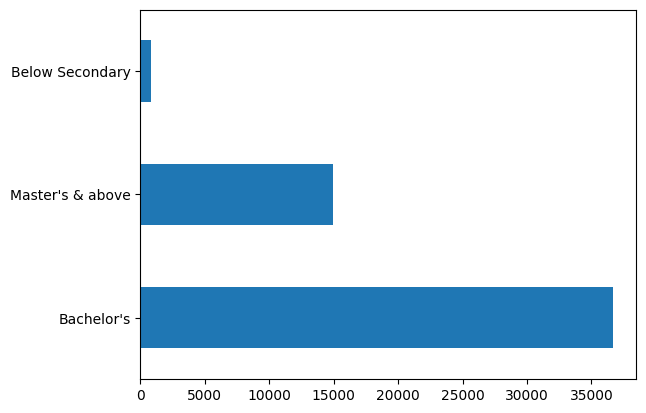

In [11]:
d['education'].value_counts().plot(kind='barh')
#Employee's Education Distribution horizontal bar chart
#The largest number of employee's highest qualification is Bachelor's Degree

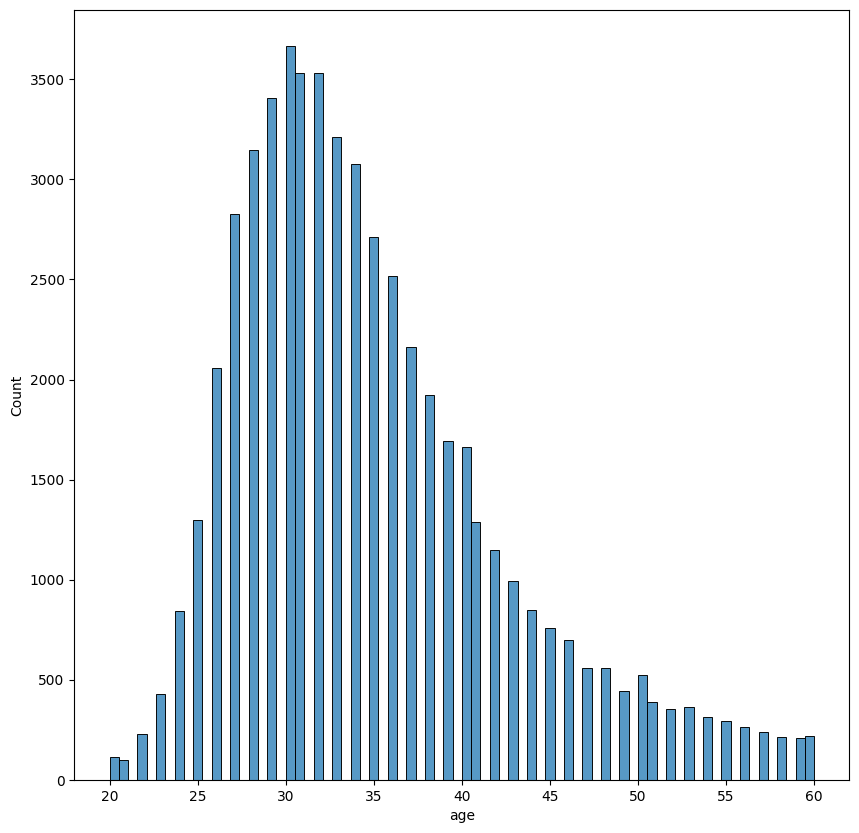

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(d.age)
plt.show()
#Employee's Age Distribution

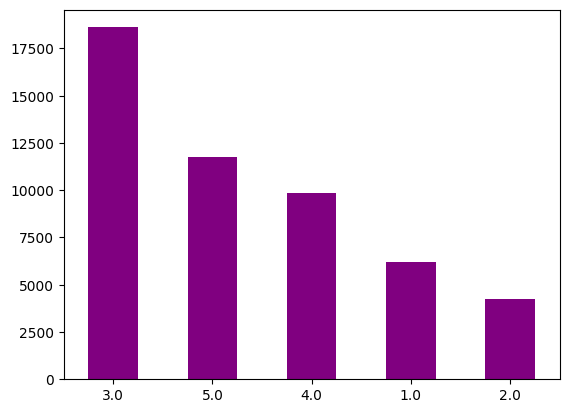

In [13]:
d['previous_year_rating'].value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.show()
#Previous Year Rating Distribution
#Most employees have 3 ratings

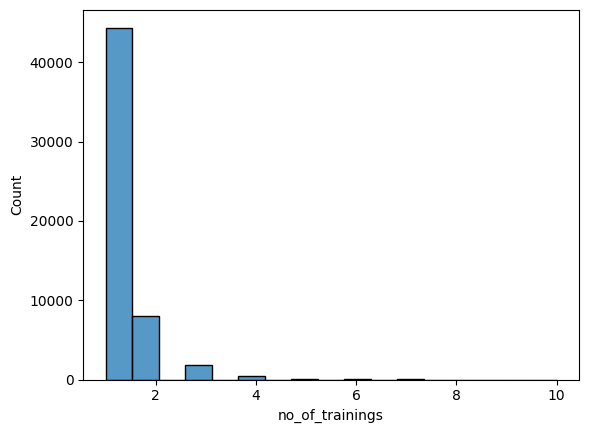

In [14]:
sns.histplot(d.no_of_trainings)
plt.show()
#No. of trainings
#most number of employees have 1 trainings

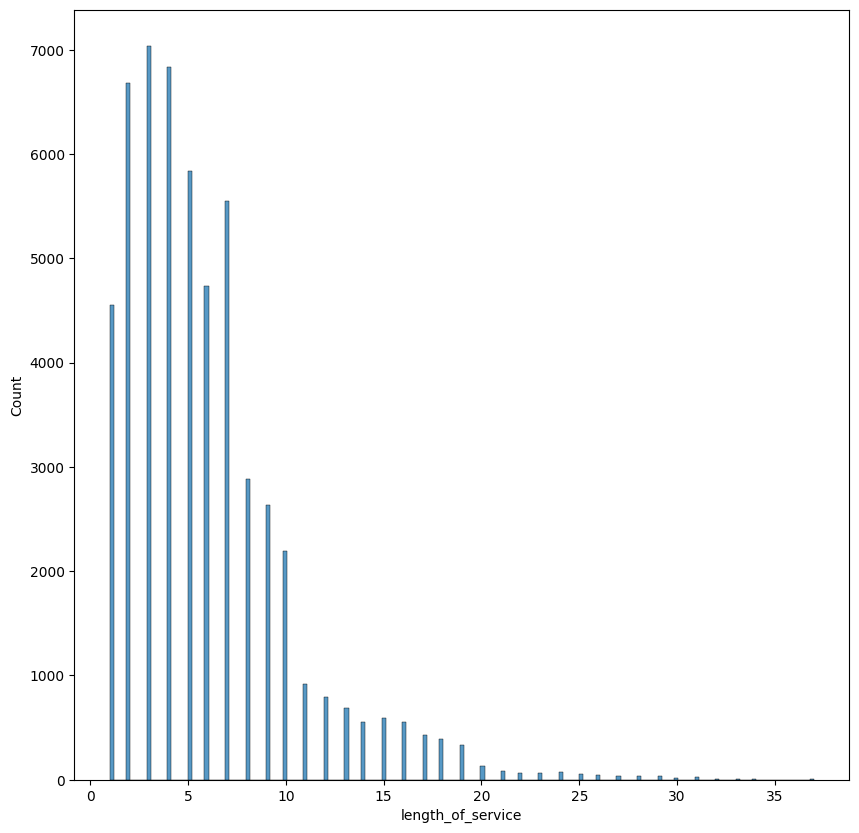

In [15]:
plt.figure(figsize=(10,10))
sns.histplot(d.length_of_service)
plt.show()
#Length of Service
#mostly the employees have 3 yrs of experience

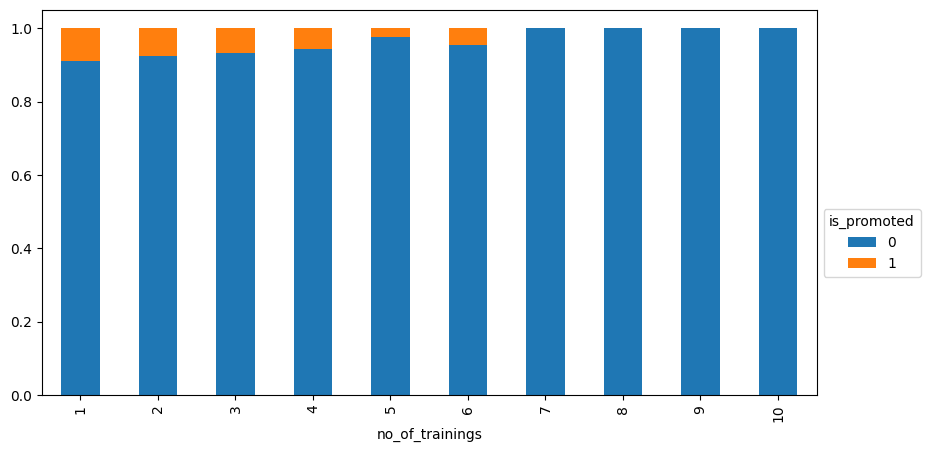

In [16]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(d.no_of_trainings,d.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
# highest number of employees promoted have been to only one training

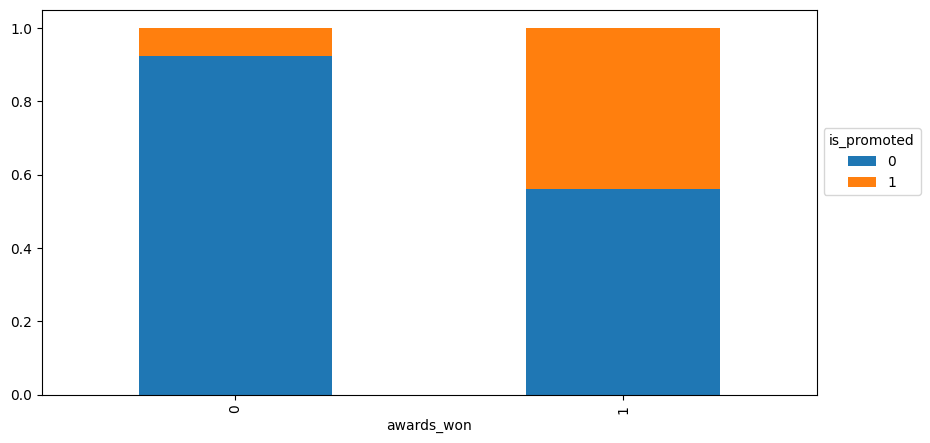

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(d.awards_won,d.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))
#Employees with more number of awards have a higher chance of being promoted

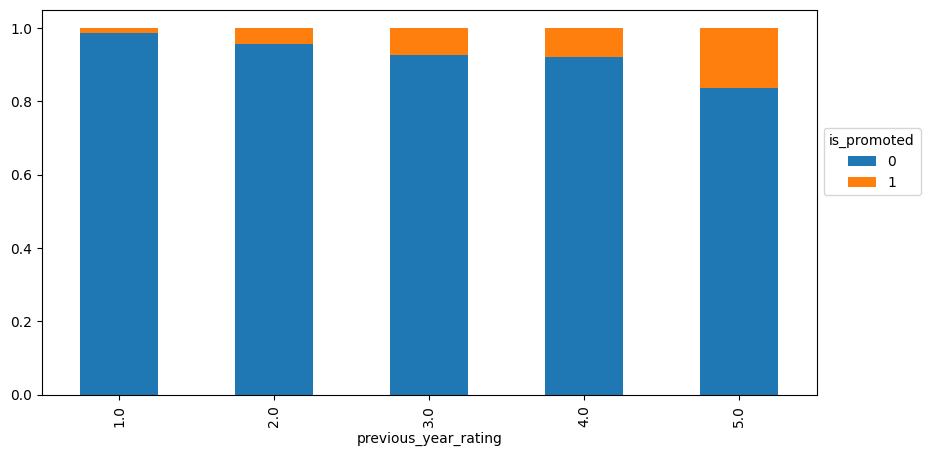

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(d.previous_year_rating,d.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

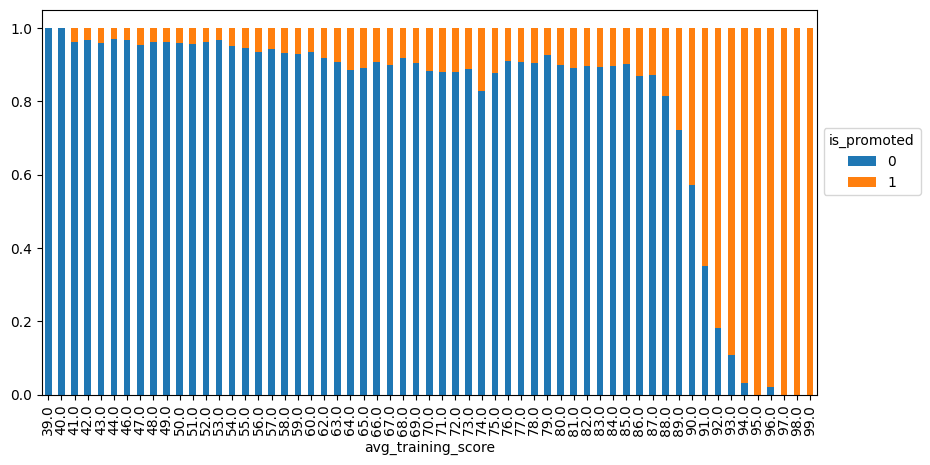

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(d.avg_training_score,d.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))
#when the avg training score is above 90 they have a higher chance of being promoted

In [20]:
le = LabelEncoder()

In [21]:
d['department'] = le.fit_transform(d['department'])
d['gender'] = le.fit_transform(d['gender'])
d['education'] = le.fit_transform(d['education'].astype(str))
d['recruitment_channel'] = le.fit_transform(d['recruitment_channel'])
d['region']=le.fit_transform(d['region'])

In [22]:
cols = [ 'previous_year_rating', 'avg_training_score']
for col in cols:
    d[col] = d[col].apply(lambda x: int(x) if x == x else 0)

In [23]:
d = d.drop('employee_id',axis=1)

In [24]:
d.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


In [25]:
d.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
X = d[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score']]
Y = d[['is_promoted']]

In [27]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,7,31,2,0,2,1,35,5,8,0,49
1,4,14,0,1,0,1,30,5,4,0,60
2,7,10,0,1,2,1,34,3,7,0,50
3,7,15,0,1,0,2,39,1,10,0,50
4,8,18,0,1,0,1,45,3,2,0,73
...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3,17,0,78
54804,4,19,2,0,0,1,37,2,6,0,56
54805,0,0,0,1,0,1,27,5,3,0,79
54806,7,33,3,1,2,1,29,1,2,0,0


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38365, 11)
(38365, 1)
(16443, 11)
(16443, 1)


In [30]:
model = LogisticRegression(solver='liblinear')

In [31]:
model.fit(X_train,Y_train)

C:\Users\SRINIVASABABU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [32]:
d.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [33]:
pred = model.predict(X_test)

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [35]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred)*100),'%')

The Accuracy score is  91.53439153439153 %


In [36]:
print('The Precision score is',(metrics.precision_score(Y_test,pred)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred)*100),'%')
#Precision gives us the percentage of Positive Cases from Total Predicted cases.
#Recall gives us the percentage of how many total Positive cases were Predicted correctly with our model.
#F1 score gives the combined result of Precision and Recall. It is a Harmonic Mean of Precision and Recall.

The Precision score is  73.48484848484848 %
The F1 score is  12.23203026481715 %
The recall score is  6.671251719394773 %


Bagging & Boosting:
Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()

In [44]:
rf.fit(X_train,Y_train)

C:\Users\SRINIVASABABU\AppData\Local\Temp\ipykernel_6964\1283773718.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [46]:
rf_predict = rf.predict(X_test)

In [49]:
print('Accuracy score: ', (metrics.accuracy_score(Y_test, rf_predict))*100, '%')
print('Precision score: ', (metrics.precision_score(Y_test, rf_predict))*100, '%')
print('F1 score: ', (metrics.f1_score(Y_test, rf_predict))*100, '%')
print('Recall score: ', (metrics.recall_score(Y_test, rf_predict))*100, '%')

Accuracy score:  93.14601958280119 %
Precision score:  85.01070663811564 %
F1 score:  41.33263925039042 %
Recall score:  27.303988995873453 %


Trying out various boosting techniques to find the most effective one

In [52]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
#Model name : Bagging classifier
bgclassifier = BaggingClassifier()

bgclassifier.fit(X_train,Y_train)
#fitting the data into model 
bg_pred = bgclassifier.predict(X_test)
#predicting results

C:\Users\SRINIVASABABU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print('The Accuracy score: ',(metrics.accuracy_score(Y_test,bg_pred)*100),'%')
print('The Precision score: ',(metrics.precision_score(Y_test,bg_pred)*100),'%')
print('The F1 score: ',(metrics.f1_score(Y_test,bg_pred)*100),'%')
print('The recall score: ',(metrics.recall_score(Y_test,bg_pred)*100),'%')

The Accuracy score:  93.10952989113909 %
The Precision score:  73.6377025036819 %
The F1 score:  46.88232536333802 %
The recall score:  34.3878954607978 %


In [59]:
#Model name: Ada Boost Classifier
model_ab = AdaBoostClassifier()

model_ab.fit(X_train,Y_train)
#training and fitting the dataset accordingly
pred_ab = model_ab.predict(X_test)
#predicting using X_test set

print('The Accuracy score: ',(metrics.accuracy_score(Y_test,pred_ab)*100),'%')
print('The Precision score: ',(metrics.precision_score(Y_test,pred_ab)*100),'%')
print('The F1 score: ',(metrics.f1_score(Y_test,pred_ab)*100),'%')
print('The recall score: ',(metrics.recall_score(Y_test,pred_ab)*100),'%')

C:\Users\SRINIVASABABU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy score:  92.20336921486347 %
The Precision score:  82.57575757575758 %
The F1 score:  25.378346915017463 %
The recall score:  14.99312242090784 %


In [58]:
#Model name: XG boosting 
model_xg = XGBClassifier()

model_xg.fit(X_train,Y_train)
#fitting the dataset
pred_xg = model_xg.predict(X_test)
#predicting using X_test dataset
print('The Accuracy score: ',(metrics.accuracy_score(Y_test,pred_xg)*100),'%')
print('The Precision score: ',(metrics.precision_score(Y_test,pred_xg)*100),'%')
print('The F1 score: ',(metrics.f1_score(Y_test,pred_xg)*100),'%')
print('The recall score: ',(metrics.recall_score(Y_test,pred_xg)*100),'%')

The Accuracy score:  93.84540533965821 %
The Precision score:  90.47619047619048 %
The F1 score:  49.400000000000006 %
The recall score:  33.97524071526822 %


In [60]:
#Model name: Gradiant boosting
model_gb = GradientBoostingClassifier()

model_gb.fit(X_train,Y_train)
#fitting the dataset

pred_gb = model_gb.predict(X_test)
#predicting the results using X_test set
print('The Accuracy score: ',(metrics.accuracy_score(Y_test,pred_gb)*100),'%')
print('The Precision score:  ',(metrics.precision_score(Y_test,pred_gb)*100),'%')
print('The F1 score: ',(metrics.f1_score(Y_test,pred_gb)*100),'%')
print('The recall score: ',(metrics.recall_score(Y_test,pred_gb)*100),'%')

C:\Users\SRINIVASABABU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy score:  93.5291613452533 %
The Precision score:   92.76315789473685 %
The F1 score:  44.29319371727749 %
The recall score:  29.09215955983494 %


The above predictions show that XGboosting technique gives 94.02 % accuracy which is the highest among the three types.

In [ ]:
#import pickle
#Pkl_Filename = "attr.pkl"  
#pickle.dump(model_xg, open(Pkl_Filename, 'wb'))